Welcome to the review of vectors and matrices. Vectors and matrices provide a foundation for various mathematical operations, your understanding of them will be essential for effectively exploring and interpreting real-world social data. By the end of this review, I hope you'll be familiar with basic data manipulation and get a feel for how powerful they can be.

## Learning goals
Refresh your knowledge of vectors and matrices:
- Vector (column) addition, subtraction, multiplication
- Data merging and deleting
- Data filtering and grouping

# Background story

At the end of one year, a trading company has hired you to help them calculate their trading results. The company is connecting to a large number of buyers, each of them has bought a number of products from them. The products of the company are in three different categories: Toys, Decorations and Clothing. For each product, they recorded its price (as Unit_Price in the unit of dollars) and the quantity sold (Sales_Quantity). They also inclueded its price and the quantity sold last year (as Unit_Price_Last_Year and Sales_Quantity_Last_Year). The recorded data is stored in the table "data_company_A_external.csv".

Use your knowledge of vector manipulation to help them in the following questions.

Note: All the data in this file are not real data, the actual situation will be more complicated than this.

In [32]:
import base64
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Read your data
external_df = pd.read_csv('data_company_A_external.csv')
internal_df = pd.read_csv('data_company_A_internal.csv')

# Bronze medal: Vector (column) addition, multiplication

a) As an important parameter of the trading status for this year, they wish they can know their total sales value for this year. The sales value of one product is the unit price ($) times the sales quantity (number). The value of total sales is the value of all product sales combined. And this is exactly the dot product of vectors.

In other words, the equations of sales are:

#### $\text{Sales}_{\text{ for one product}} = \text{Unit Price} \times \text{Sales Quantity}$

#### $\text{Total Sales} = \text{Sum of sales for all products}$

If $V_{\text{Unit Price}}$ is the vector representing all unit price, and $V_{\text{Sales Quantity}}$ is the one for sales quantity, the equation will be:

### $V_{\text{Total Sales}} = V_{\text{Unit Price}} \cdot V_{\text{Sales Quantity}}$

Can you help them calculate their total sales for this year? (Try to manipulate on the entire column rather than each product)

In [34]:
def compute_total_sales(df):

    total_sales = (df['Unit_Price'] * df['Sales_Quantity']).sum()
    return total_sales

print("The total sales this year is: ${:.2f}".format(compute_total_sales(external_df)))

The total sales this year is: $20348107.40


In [35]:
# Run the following code to show one of the possible answer
print(base64.b64decode("ZGVmIGNvbXB1dGVfdG90YWxfc2FsZXMoZGYpOgogICAgdG90YWxfc2FsZXMgPSBkZlsnVW5pdF9QcmljZSddLmRvdChkZlsnU2FsZXNfUXVhbnRpdHknXSkKICAgIHJldHVybiB0b3RhbF9zYWxlcwoKVGhlIHRvdGFsIHNhbGVzIHRoaXMgeWVhciBpczogMjAzNDgxMDcuNDA=").decode())

def compute_total_sales(df):
    total_sales = df['Unit_Price'].dot(df['Sales_Quantity'])
    return total_sales

The total sales this year is: 20348107.40


b) Their data also contains information from last year. So we can calculate growth and growth rate of total sales compared to last year.

The growth and growth rate are parameters that describes how much a particular variable, like total sales here, has grown over a period of time. Growth of total sales is calculated by subtracting the total sales of the previous year from the total sales of the current year. It answers the question, "By how much did our sales figures change when compared to last year?"

Mathematically, the formula to calculate sales growth is:

$ \text{Growth} = \text{Total Sales This Year} - \text{Total Sales Last Year} $

And growth rate is typically expressed as a percentage of the initial value and can be calculated using the formula:

$ \text{Growth Rate} = \left( \frac{{\text{Growth}}}{{\text{Total Sales Last Year}}} \right) \times 100 $

Can you help them calculate what the growth and growth rate?

In [36]:
def compute_growth(df):
    total_growth = (df['Sales_Quantity'] - df['Sales_Quantity_Last_Year']).sum()
    return total_growth

def compute_growth_rate(df):
    growth_rate = ((df['Sales_Quantity'].sum() - df['Sales_Quantity_Last_Year'].sum()) 
                   / df['Sales_Quantity_Last_Year'].sum()) * 100
    return growth_rate

print("Growth: {:.2f}".format(compute_growth(external_df)))
print("Growth Rate: {:.2f} %".format(compute_growth_rate(external_df)))

Growth: 56996.00
Growth Rate: 0.63 %


# Silver medal: Database merging and deleting

a) In a further step, the company wanted to know how much money it had made this year. For this purpose, they provide another internal dataset for this year that captures the profit margin for each product, the promotional inputs they spend, and fixed costs as the sum of other expenses.

The equation for the total profit is:

### $\text{Total Profit} = \sum \left( \text{Sales} \times \text{Profit Margin} - \text{Fixed Costs} \right)$

The sales here is the sales for one prodoct, and the summation sumes over all products.

Can you combine these two sets of data into one and calculate the total profit?

In [43]:
def total_profit():
    merged = pd.merge(external_df, internal_df, on="Product_Index")
    
    merged['Sales'] = merged['Unit_Price'] * merged['Sales_Quantity']
    
    merged['Profit'] = merged['Sales'] * merged['Profit_Margin'] - merged['Fixed_Costs']
    
    total_profit = merged['Profit'].sum()
    return total_profit

print("Total Profit: ${:.2f}".format(total_profit()))

Total Profit: $847231.27


b) Two buyers (buyer IDs: "IFKKSE" and "IFYWAB") cancelled their orders on short notice. In this case we would like to delete the corresponding products and calculate the new profit.

In [54]:
merged_df = external_df.merge(internal_df, on="Product_Index")

def compute_profit_delete(merged_df):
    filtered_df = merged_df[~merged_df['Buyer_ID'].isin(["IFKKSE", "IFYWAB"])]
    
    filtered_df['Profit'] = (
        filtered_df['Unit_Price'] * filtered_df['Sales_Quantity'] * filtered_df['Profit_Margin']) - filtered_df['Fixed_Costs']
    
    return filtered_df['Profit'].sum()

print(f"New Profit: ${compute_profit_delete(merged_df):.2f}")

New Profit: $771140.45


/var/folders/xh/wqndc12d0vn7d81_h0_dh1ch0000gp/T/ipykernel_20350/1321904078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Profit'] = (


c) While in practice, it is often not possible to simply delete entries from the database. Technically, this can cause problems for other functions that depend on the entry. And in the commercial sector, there are often additional trading rules to solve these problems.

Now let's assume that a common treatment taken by this company is to return the products to the manufacturer. And when they return the corresponding products to the manufacturer, the manufacturer refunds them only 80% of the unit price.

Can you calculate the profit in this case? Do you need to re-import the database when you complete this step?

In [56]:
def compute_profit_refund(df):
    adjusted_df = df.copy()
    
    adjusted_df['Profit'] = (
        adjusted_df['Unit_Price'] * adjusted_df['Sales_Quantity'] * adjusted_df['Profit_Margin']
    ) - adjusted_df['Fixed_Costs']
    
    mask = adjusted_df['Buyer_ID'].isin(["IFKKSE", "IFYWAB"])
    adjusted_df.loc[mask, 'Profit'] = (
        0.8 * adjusted_df.loc[mask, 'Unit_Price'] * adjusted_df.loc[mask, 'Sales_Quantity']
    ) - adjusted_df.loc[mask, 'Fixed_Costs']
    
    return adjusted_df['Profit'].sum()

print(f"Profit with Adjustments: ${compute_profit_refund(merged_df):.2f}")

Profit with Adjustments: $2915222.35


# Gold medal: Data filtering and grouping

a) We would like to discover further information hidden in the data. Can you plot sales against promotional inputs and check if some kind of pattern exists? 

If you have found some patterns, you can move on to the next question. If not, at the end of this content (the part marked by *) we have provided two hints for you to use at your leisure.

(Note again, the patterns in this question is not the actual law of the market.)

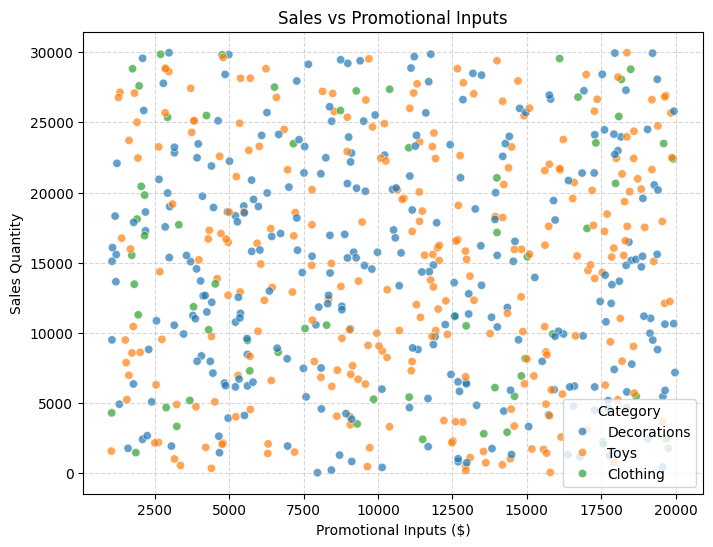

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sales_vs_promo(df):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df,
        x='Promotional_Input',
        y='Sales_Quantity',
        hue='Category',   
        alpha=0.7
    )
    plt.title("Sales vs Promotional Inputs")
    plt.xlabel("Promotional Inputs ($)")
    plt.ylabel("Sales Quantity")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

plot_sales_vs_promo(merged_df)

b) According to the observed patterns, if there is a product belonging to the "Decorations" category and the company spends $15,000 on its promotional input, how many sales can be expected? (Try to estimate its value, or choose an answer from the following options)

In [60]:
from sklearn.linear_model import LinearRegression
import numpy as np

def estimate_sales(df):
    decorations = df[df['Category'] == "Decorations"]

    X = decorations[['Promotional_Input']]
    y = decorations['Sales_Quantity']

    model = LinearRegression()
    model.fit(X, y)

    prediction = model.predict(np.array([[15000]]))
    return prediction[0]

def select_answer(df):
    prediction = estimate_sales(df)
    answer_ranges = {
        'A': 'Between 30000 and 34000',
        'B': 'Between 34000 and 38000',
        'C': 'Between 38000 and 42000',
        'D': 'Between 42000 and 46000',
        'E': 'Between 46000 and 50000',
        'F': 'Between 50000 and 60000',
    }
    for key, val in answer_ranges.items():
        lower, upper = [int(x) for x in val.split() if x.isdigit()]
        if lower <= prediction <= upper:
            return key
    return None

if select_answer(merged_df) is None:
    print("Estimated sales for a Decorations product with $15,000 in promotional inputs: {:.2f}".format(estimate_sales(merged_df)))
else:
    ans_key = select_answer(merged_df)
    print("Estimated sales for a Decorations product with $15,000 in promotional inputs: {:s}".format(ans_key))

Estimated sales for a Decorations product with $15,000 in promotional inputs: 14261.10


/Users/yvanpiccirilli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/yvanpiccirilli/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


*: Here are two hints for the gold Medal, they will make this task easier. You can try to find the pattern by yourself and then check the hints at some point later.

In [61]:
# Run the following code to show hint 1
print(base64.b64decode("SGludCAxOiBUaGUgdGFibGUgY29udGFpbnMgYWxsIGtpbmRzIG9mIHByb2R1Y3RzIG9mIHRoZSBjb21wYW55LCB3aGljaCBtYXkgYWxzbyBjb250YWluIHNwZWNpYWwgcHJvZHVjdHMgb3IgcHJvZHVjdHMgc29sZCB0aHJvdWdoIHNwZWNpYWwgbWV0aG9kcy4gU3VjaCBwcm9kdWN0cyBhcmUgY2hhcmFjdGVyaXplZCBieSB0aGUgZmFjdCB0aGF0IHRoZXkgd2lsbCB1c3VhbGx5IGhhdmUgZXhjZXB0aW9uYWxseSBoaWdoIG9yIGxvdyBwcm9maXQgbWFyZ2lucy4=").decode())

Hint 1: The table contains all kinds of products of the company, which may also contain special products or products sold through special methods. Such products are characterized by the fact that they will usually have exceptionally high or low profit margins.


In [62]:
# Run the following code to show hint 2
print(base64.b64decode("SGludCAyOiBEaWZmZXJlbnQgcHJvZHVjdCBjYXRlZ29yaWVzIGhhdmUgZGlmZmVyZW50IG1hcmtldHMgYW5kIG1heSBoYXZlIGRpZmZlcmVudCBwYXR0ZXJucy4=").decode())

Hint 2: Different product categories have different markets and may have different patterns.
